In [1]:
# パレートチャート
# dataset: SalesKaggle3.csv

# library
from abc_analysis import abc_analysis
from abc_analysis import abc_plot
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
# dataset
sample_label = ["a", "b", "c", "d", "e", "f", "g"]
np.random.seed(seed=42)
sample_data = np.random.randint(0, 100, size=7)

In [3]:
print(sample_data)

[51 92 14 71 60 20 82]


In [4]:
plt.rcParams['font.size'] = 12  # matplotlibのグラフのフォントの調整

In [5]:
sample_df = pd.DataFrame({"label": sample_label, "data":sample_data}, columns=["label", "data"])
sample_df

,label,data
0,a,51
1,b,92
2,c,14
3,d,71
4,e,60
5,f,20
6,g,82


In [6]:
# データ・セットのソート
sample_df = sample_df.sort_values(by="data", ascending=False)
sample_df

,label,data
1,b,92
6,g,82
3,d,71
4,e,60
0,a,51
5,f,20
2,c,14


In [7]:
# 累積和をとる
sample_df["accum"] = np.cumsum(sample_df["data"])
sample_df

,label,data,accum
1,b,92,92
6,g,82,174
3,d,71,245
4,e,60,305
0,a,51,356
5,f,20,376
2,c,14,390


In [8]:
# 累積和の割合の計算
# パーセント表示の割合を作成する
sample_df["accum_percent"] = sample_df["accum"] / sum(sample_df["data"]) * 100
sample_df

,label,data,accum,accum_percent
1,b,92,92,23.589744
6,g,82,174,44.615385
3,d,71,245,62.820513
4,e,60,305,78.205128
0,a,51,356,91.282051
5,f,20,376,96.410256
2,c,14,390,100.000000


Text(0.5, 1.0, 'PARETO_CHART')

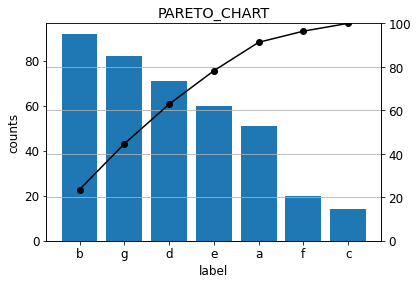

In [10]:
# シンプルなパレート図の作成
fig, ax1 = plt.subplots(figsize=(6,4))
data_num = len(sample_df)

ax1.bar(range(data_num), sample_df["data"])
ax1.set_xticks(range(data_num))
ax1.set_xticklabels(sample_df["label"].tolist())
ax1.set_xlabel("label")
ax1.set_ylabel("counts")

ax2 = ax1.twinx()
ax2.plot(range(data_num), sample_df["accum_percent"], c="k", marker="o")
ax2.set_ylim([0, 100])

ax2.grid(True, which='both', axis='y')

ax1.set_title("PARETO_CHART")

Text(0.5, 1.0, 'PARETO_CHART')

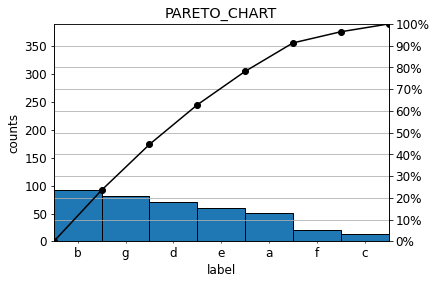

In [11]:
fig, ax1 = plt.subplots(figsize=(6,4))
data_num = len(sample_df)

accum_to_plot = [0] + sample_df["accum_percent"].tolist()

percent_labels = [str(i) + "%" for i in np.arange(0, 100+1, 10)]

ax1.bar(range(1, data_num + 1), sample_df["data"], align="edge", width=-1, edgecolor='k')

ax1.set_xticks([0.5 + i for i in range(data_num)], minor=True)
ax1.set_xticklabels(sample_df["label"].tolist(), minor=True)
ax1.tick_params(axis="x", which="major", direction="in")
# 変更はここだけ
ax1.set_ylim([0, sum(sample_df["data"])])
ax1.set_xlabel("label")
ax1.set_ylabel("counts")

ax2 = ax1.twinx()
ax2.set_xticks(range(data_num+1))
ax2.plot(range(data_num+1), accum_to_plot, c="k", marker="o")
ax2.set_xticklabels([])
ax2.set_xlim([0,data_num])
ax2.set_ylim([0, 100])
ax2.set_yticks(np.arange(0, 100+1, 10))
ax2.set_yticklabels(percent_labels)

ax2.grid(True, which='both', axis='y')

ax1.set_title("PARETO_CHART")

# plt.savefig("../output/pareto_chart4.png", bbox_inches="tight")

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [13]:
abc_analysis?

Signature: abc_analysis(psData, boolPlotResult=False, fltSize=6)
Docstring:
Performs an ABC analysis on given data-vector

Args:
    psData (pandas.series): Numeric data vector that can be converted to a 
                            pandas series(list, dictionary, series)
    boolPlotResult (boolean): Creates a matplotlib visualization of the
                              ABC analysis results
    fltSize (float): Size of matplotlib figure

Returns:
    Dictionary with results of the ABC analysis:
        ABLimit: Limit between A and B in raw yield (e.g. euro)
        BCLimit: Limit between B and C in raw yield (e.g. euro)
        ABexchanged: If true A and B are exchanged because the conditions 
                     for finding A and B in this case applied to each other
        Aind: Indices of group A in input vector (numeric indices)
        Bind: Indices of group B in input vector (numeric indices)
        Cind: Indices of group C in input vector (numeric indices)
        smallestAD

In [14]:
dctAnalysis = abc_analysis([1, 15, 25, 17, 2, 3, 5, 6, 2, 3, 22])

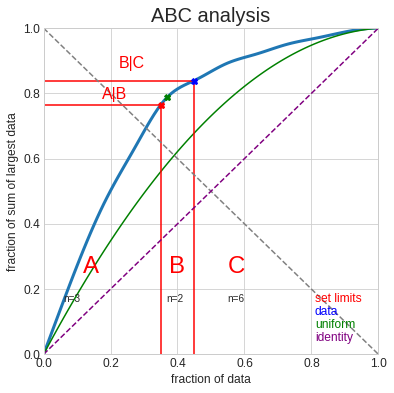

In [18]:
abc_plot(dctAnalysis)

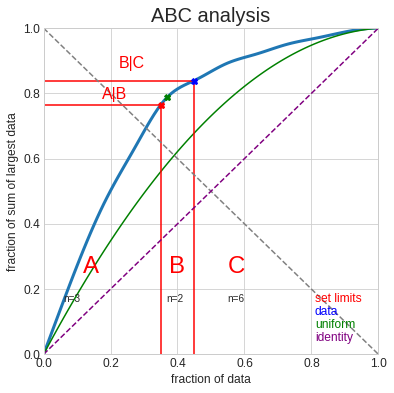

In [15]:
# plot
dctAnalysis = abc_analysis([1, 15, 25, 17, 2, 3, 5, 6, 2, 3, 22], True)

In [21]:
# 円グラフ
sample_label

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [22]:
sample_data

array([51, 92, 14, 71, 60, 20, 82])

([<matplotlib.patches.Wedge at 0x7ff9266aefd0>,
 [Text(0.4393010644377817, 1.0084714050402381, 'a'),
  Text(1.0999643117072382, 0.008860754506349516, 'b'),
  Text(0.7294348788493877, -0.8233618630456352, 'c'),
  Text(0.04429245430231253, -1.0991079012052811, 'd'),
  Text(-0.9344147886181798, -0.5804041719454145, 'e'),
  Text(-1.0956844552485292, 0.09734256277052777, 'f'),
  Text(-0.674897573318164, 0.8686272304787904, 'g')])

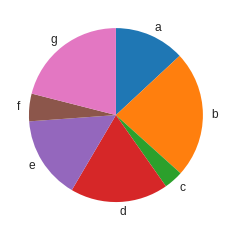

In [23]:
plt.pie(x=sample_data, labels=sample_label, counterclock=False, startangle=90)

In [65]:
x_1 = np.arange(4)

x_1

y_1 = np.array([10, 5, 3, 2])

sum_y1 = np.sum(y_1)

y_2 = np.cumsum(y_1) / sum_y1

fig_pareto = plt.figure()

ax1 = fig_pareto.add_subplot(111)

ax2 = ax1.twinx()

ax1.bar(x_1, y_1)

ax2.plot(x_1, y_2, c='r')

fig_pareto